# Lab 0 - Python and Jupyter notebook introduction


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1 Warm-up Exercises

Try the following commands on your jupyter notebook or python editor and see what output they produce.

In [2]:
a = 1 + 5
b = 2
c = a + b
print(a / b)
print(a // b)
print(a - b)
print(a * b)
print(a**b)

3.0
3
4
12
36


In [3]:
a = np.array([[3, 1],
              [1, 3]])
b = np.array([[3],
              [5]])
print(a * b)
print(np.dot(a, b))
print(np.dot(b.T, a))
c = a**(-1.0)
print(c * a)

[[ 9  3]
 [ 5 15]]
[[14]
 [18]]
[[14 18]]
[[1. 1.]
 [1. 1.]]


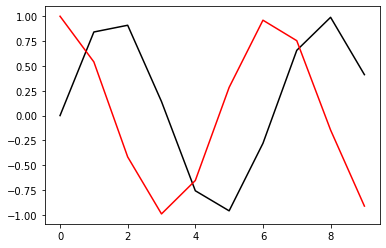

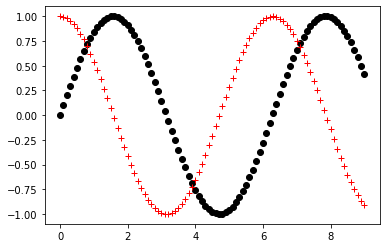

In [4]:
t = np.arange(10)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'k', t, h, 'r');

t = np.arange(0, 9.1, 0.1)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'ok', t, h, '+r');

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[1.00230524e+00 1.78186583e+01 3.16774344e+02 5.63151182e+03
 1.00115196e+05 1.77981556e+06 3.16409854e+07 5.62503203e+08
 1.00000000e+10]
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01]


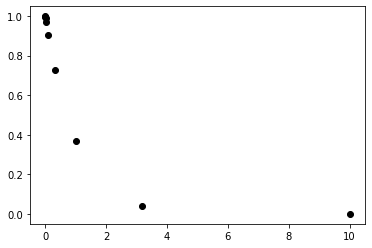

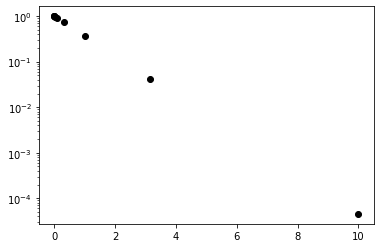

In [5]:
t = np.linspace(0, 10, 20)
print(t)
t = np.logspace(0.001, 10, 9)
print(t)
t = np.logspace(-3, 1, 9)
print(t)
y = np.exp(-t)

plt.figure()
plt.plot(t, y, 'ok')
plt.figure()
plt.semilogy(t, y, 'ok')

## 2 Integration Function

Here is a more complicated function that computes the integral $y(x)$ with interval $dx$:

$$c = \int y(x) dx \sim \sum_{i=1}^N y_i dx_i .$$

It can deal with both cases of even and uneven sampling.

In [6]:
def integral(y, dx):
    # function c = integral(y, dx)
    # To numerically calculate integral of vector y with interval dx:
    # c = integral[ y(x) dx]
    # ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    if nx == 1: # ’==’, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
    # x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
    # If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c


Save this program as `integral.py`. Now we can call it to compute $\int_0^\pi \sin(t) dt$
with an evenly sampled time series (`even.py`).

1.9998321638939935


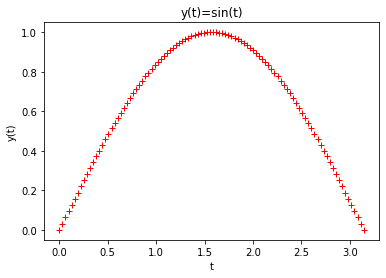

In [7]:
# number of samples
nt = 100
# generate time vector
t = np.linspace(0, np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.sin(t)
plt.plot(t, y, 'r+')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('y(t)=sin(t)')
plt.savefig('fig1.png')

c = integral(y, dt)
print(c)

### Part 1 (Collaborators: None)

First plot $y(t)$. Is the output $c$ value what you are expecting for
$\int_0^\pi \sin(t) dt$? How can you improve the accuracy of your computation?

A: The output $c$ value of $1.9998321638939935$ is close to what I expected for the integral, which is a value of 2 if the integral is computed manually.

To improve accuracy of the computation, we can increase $nt$, the number of samples. This would decrease the sample interval $dt$ so we are less likely to exclude area.

### Part 2 (Collaborators: None)

For an unevenly spaced time series that depicts $\sin[2 \pi (8t-4t^2)]$, the so-called chirp function,
compute $\int_0^1 \sin[2 \pi (8t-4t^2)] dt$ (saved as `uneven.py`).

-0.10540213617112387


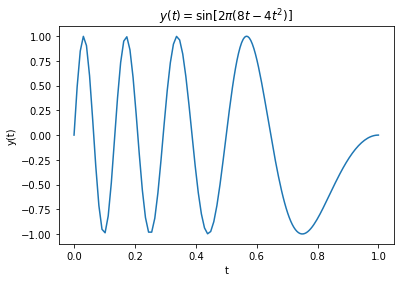

In [8]:
nt = 50
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values 
y = np.sin(2 * np.pi * (8*t - 4*t**2))
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('$y(t) = \sin[2\pi(8t-4t^2)]$')
plt.savefig('fig2.png')

# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)

Show your plot of $y(t)$ (for $nt = 50$). Try different $nt$ values and see
how the integral results change. Write a `for` loop around the statements above to try
a series of `nt` values (e.g, 20, 50, 100, 500, 1000) and generate a plot of $c(nt)$.
What value does $c$ converge to after using larger and larger $nt$? (Please include your
modified Python code.)

[-0.10512960757524328, -0.10512960622449945, -0.10512960487784152, -0.10512960353525433, -0.10512960219672084, -0.10512960086222455, -0.10512959953174952, -0.10512959820528014, -0.10512959688279969]


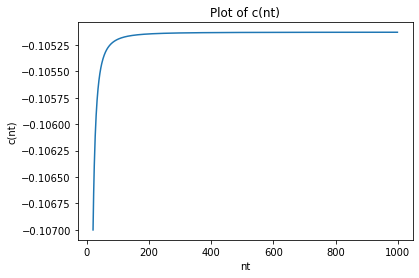

In [9]:
# Modified code for c(nt)
c = []
val = np.arange(20,1000,1)
for nt in val:    
    # sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, nt)
    # double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*nt)
    # concatenate time vector
    t = np.concatenate((t1[:-1], t2))
    # compute y values 
    y = np.sin(2 * np.pi * (8*t - 4*t**2))
    # compute sampling interval vector
    dt = t[1:] - t[:-1] 
    c.append(integral(y, dt))

print(c[-10:-1]) # last ten results
plt.plot(val, c)
plt.xlabel('nt')
plt.ylabel('c(nt)')
plt.title('Plot of c(nt)')
plt.savefig('fig3.png')

As $nt$ increases, $c$ converges to $\int_0^1 \sin[2\pi(8t-4t^2)] = -0.10540213617112387$.

## 3 Accuracy of Sampling (Collaborators: Erich Fernandes)

Let us sample the function $g(t) = \cos(2 \pi f t)$ at sampling interval $dt = 0.5$, for frequency values of
$f = 0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0$ hertz.

In each case, plot on the screen the points of the resulting time series (as isolated red crosses) to
see how well it approximates $g(t)$ (plotted as a blue-dotted line, try a very small $dt$ fine
sampling). Submit only plots for frequencies of $0.25$ and $0.75$
Hertz, use xlabel, ylabel, title commands to annotate each plot.
For each frequency that you investigated, do you think the sampling time series is a fair representation of
the original time series $g(t)$? What is the apparent frequency for the sampling time series? (Figure out
after how many points (N) the series repeats itself, then the apparent frequency = 1/(N*dt). You can do this either
mathematically or by inspection. A flat time series has apparent frequency = 0.) Can you guess with a
sampling interval of $dt = 0.5$, what is the maximum frequency $f$ of $g(t)$
such that it can be fairly represented by the discrete time series? (Please attach your Python code.)

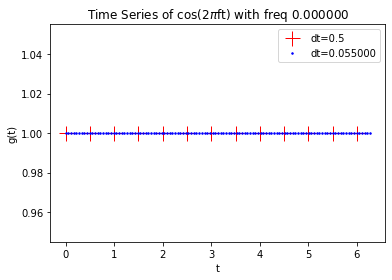

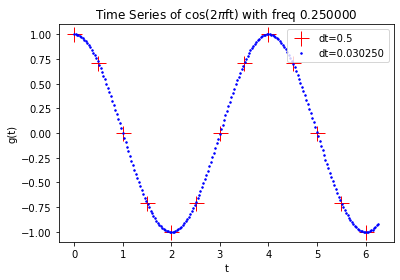

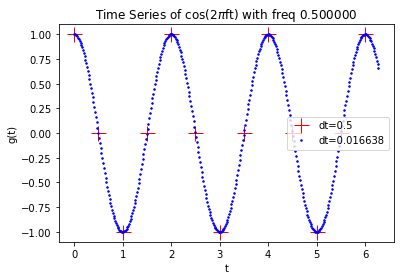

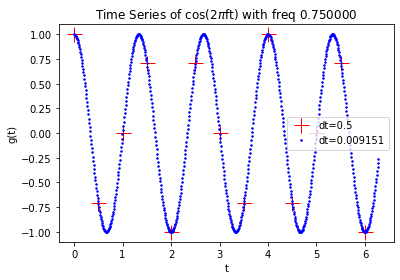

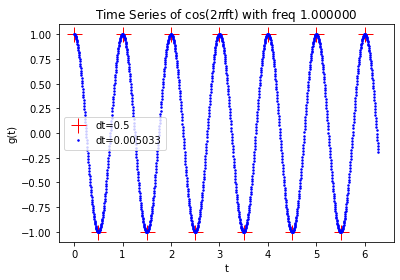

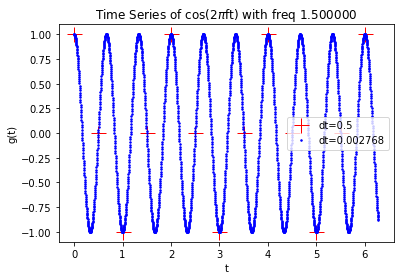

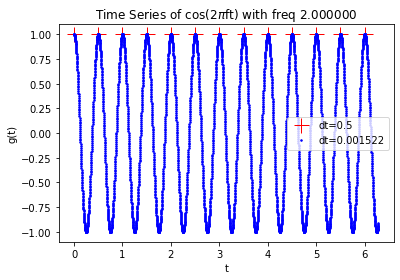

In [10]:
# for loop for all the frequency values
dt2 = 0.1 # for g(t), not samples
for f in [0,0.25,0.5,0.75,1,1.5,2]:
    dt1 = 0.5 # for samples
    t1 = np.arange(0, 2*np.pi, dt1) 
    y = np.cos(2*np.pi*f*t1)
    dt2 = 0.55*dt2
    t2 = np.arange(0, 2*np.pi, dt2)
    g = np.cos(2*np.pi*f*t2)
    plt.plot(t1, y, 'r+', markersize=15)
    plt.plot(t2, g, 'b.', markersize=3)
    plt.xlabel('t')
    plt.ylabel('g(t)')
    plt.title('Time Series of cos(2$\pi$ft) with freq %f' %f)
    plt.legend(['dt=0.5','dt=%f' %dt2])
    plt.show()

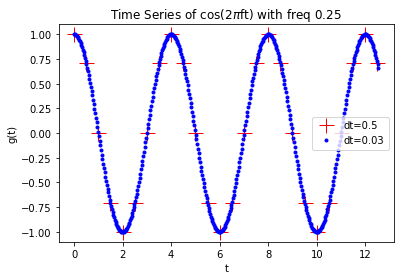

In [11]:
# Submit
f = 0.25
dt1 = 0.5
t1 = np.arange(0, 4*np.pi, dt1) 
y = np.cos(2*np.pi*f*t1)
dt2 = 0.03
t2 = np.arange(0, 4*np.pi, dt2)
g = np.cos(2*np.pi*f*t2)

plt.plot(t1, y, 'r+', markersize=15)
plt.plot(t2, g, 'b.')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.title('Time Series of cos(2$\pi$ft) with freq 0.25')
plt.legend(['dt=0.5','dt=0.03'])
plt.savefig('fig4.png')

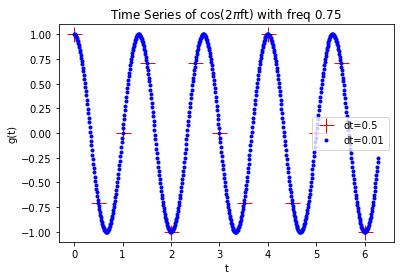

In [12]:
# Submit
f = 0.75
dt1 = 0.5
t1 = np.arange(0, 2*np.pi, dt1) 
y = np.cos(2*np.pi*f*t1)
dt2 = 0.01
t2 = np.arange(0, 2*np.pi, dt2)
g = np.cos(2*np.pi*f*t2)

plt.plot(t1, y, 'r+', markersize=15)
plt.plot(t2, g, 'b.')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.title('Time Series of cos(2$\pi$ft) with freq 0.75')
plt.legend(['dt=0.5','dt=0.01'])
plt.savefig('fig5.png')

Q: For each frequency that you investigated, do you think the sampling time series is a fair representation of the original time series $g(t)$?

A: The sampling time series is a fair representation of the original time series $g(t)$ at lower frequencies such as 0 (obviously), 0.25, and possibly 0.5 hertz. The samples hit important points like the minima, maxima and points of inflection and they also have an apparent frequency that is equal to the true frequency. However when we get to larger frequencies like 0.75, 1.5, 2 hertz these sampling time series miss crucial points that define the original time series so they are not a good representation. The exception is 1 hertz where the sampling time series has the an apparent frequency of 1.

Q: What is the apparent frequency for the sampling time series?

A: The apparent frequency for the sampling time series is in the table below. For example if we have $f$ = 0.75 then the apparent frequency is 0.25, even though the true frequency is 0.75. This is because the samples occur N = 8 times per cycle so the frequency is $1/(N*dt) = 1/(8*0.5) = 0.25$.

| Frequency | Points the series repeats itself (N) | Apparent frequency |
|-|-|-|
| 0 | N/A (flat line) | 0 |
| 0.25 | 8 | 0.25 |
| 0.5 | 4 | 0.5 |
| 0.75 | 8 | 0.25 |
| 1 | 2 | 1 |
| 1.5 | 4 | 0.5 |
| 2 | N/A (flat line) | 0 |

Q: Can you guess with a sampling interval of $dt=0.5$ , what is the maximum frequency $f$ of $g(t)$ such that it can be fairly represented by the discrete time series?

A: I estimate the maximum frequency to be 0.5. This is because after the frequency goes beyond 0.5 the apparent frequency does not match the true frequency. 